# IMPORT FILE FROM KAGGLE

In [ ]:
#pip installed
! pip install -q kaggle

In [ ]:
#@title Create kaggle.json file

!touch kaggle.json
!echo '{"username":"buiquangminh","key":"0e0395598dc3155bb2256da83c78520b"}' > kaggle.json

In [ ]:
#Make a Directory and copy the kaggle.json file to the directory
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
#Changing Permission
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d whenamancodes/alcohol-effects-on-study

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 14.9MB/s]


In [ ]:
! unzip alcohol-effects-on-study.zip && rm alcohol-effects-on-study.zip


Archive:  alcohol-effects-on-study.zip
  inflating: Maths.csv               
  inflating: Portuguese.csv          


# DATA PRE-PROCESSING AND FEATURING ENGINEERING


In this section, i will just focus on analyzing what factors impact on students math's grade

Here is the explaination for each attributes:

* school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex: student's sex (binary: 'F' - female or 'M' - male)
* age: student's age (numeric: from 15 to 22)
* address: student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - (5th to 9th grade), 3 - (secondary education) or 4 - (higher education))
* Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - (5th to 9th grade), 3 - (secondary education) or 4 - (higher education))
* Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian: student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures:number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup: extra educational support (binary: yes or no)
* famsup: family educational support (binary: yes or no)
* paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities: extra-curricular activities (binary: yes or no)
* attended nursery school (binary: yes or no)
* higher: wants to take higher education (binary: yes or no)
* internet: Internet access at home (binary: yes or no)
* romantic: with a romantic relationship (binary: yes or no)
* famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime: free time after school (numeric: from 1 - very low to 5 - very high)
* goout: going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health: current health status (numeric: from 1 - very bad to 5 - very good)
* absences: number of school absences (numeric: from 0 to 93)
* G1: first period grade (numeric: from 0 to 20)
* G2: second period grade (numeric: from 0 to 20)
* G3: final grade (numeric: from 0 to 20, output target)



In [ ]:
import pandas as pd

In [ ]:
#reading dataset
maths=pd.read_csv('Maths.csv')


Analyzing data

In [ ]:
maths.shape

(395, 33)

In [ ]:
maths.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
#checking for duplication
maths.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [ ]:
#missing value calculation
maths.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
maths.describe().T

count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1          395.0  10.908861  3.319195   3.0   8.0  11.0  13.0  19.0
G2          395.0  10.713924  3.761505   0.0   9.0  11.0  13.0  19.0
G3          395.0  10.415190  4.581443   0.0   8.0  11.0  14.0  20.0

In [ ]:
maths.describe(include='all').T

count unique     top freq       mean       std   min   25%   50%  \
school        395      2      GP  349        NaN       NaN   NaN   NaN   NaN   
sex           395      2       F  208        NaN       NaN   NaN   NaN   NaN   
age         395.0    NaN     NaN  NaN  16.696203  1.276043  15.0  16.0  17.0   
address       395      2       U  307        NaN       NaN   NaN   NaN   NaN   
famsize       395      2     GT3  281        NaN       NaN   NaN   NaN   NaN   
Pstatus       395      2       T  354        NaN       NaN   NaN   NaN   NaN   
Medu        395.0    NaN     NaN  NaN   2.749367  1.094735   0.0   2.0   3.0   
Fedu        395.0    NaN     NaN  NaN   2.521519  1.088201   0.0   2.0   2.0   
Mjob          395      5   other  141        NaN       NaN   NaN   NaN   NaN   
Fjob          395      5   other  217        NaN       NaN   NaN   NaN   NaN   
reason        395      4  course  145        NaN       NaN   NaN   NaN   NaN   
guardian      395      3  mother  273        NaN       NaN   NaN   NaN   NaN   
traveltime  395.0    NaN     NaN  NaN   1.448101  0.697505   1.0   1.0   1.0   
studytime   395.0    NaN     NaN  NaN   2.035443   0.83924   1.0   1.0   2.0   
failures    395.0    NaN     NaN  NaN   0.334177  0.743651   0.0   0.0   0.0   
schoolsup     395      2      no  344        NaN       NaN   NaN   NaN   NaN   
famsup        395      2     yes  242        NaN       NaN   NaN   NaN   NaN   
paid          395      2      no  214        NaN       NaN   NaN   NaN   NaN   
activities    395      2     yes  201        NaN       NaN   NaN   NaN   NaN   
nursery       395      2     yes  314        NaN       NaN   NaN   NaN   NaN   
higher        395      2     yes  375        NaN       NaN   NaN   NaN   NaN   
internet      395      2     yes  329        NaN       NaN   NaN   NaN   NaN   
romantic      395      2      no  263        NaN       NaN   NaN   NaN   NaN   
famrel      395.0    NaN     NaN  NaN   3.944304  0.896659   1.0   4.0   4.0   
freetime    395.0    NaN     NaN  NaN   3.235443  0.998862   1.0   3.0   3.0   
goout       395.0    NaN     NaN  NaN   3.108861  1.113278   1.0   2.0   3.0   
Dalc        395.0    NaN     NaN  NaN   1.481013  0.890741   1.0   1.0   1.0   
Walc        395.0    NaN     NaN  NaN   2.291139  1.287897   1.0   1.0   2.0   
health      395.0    NaN     NaN  NaN    3.55443  1.390303   1.0   3.0   4.0   
absences    395.0    NaN     NaN  NaN   5.708861  8.003096   0.0   0.0   4.0   
G1          395.0    NaN     NaN  NaN  10.908861  3.319195   3.0   8.0  11.0   
G2          395.0    NaN     NaN  NaN  10.713924  3.761505   0.0   9.0  11.0   
G3          395.0    NaN     NaN  NaN   10.41519  4.581443   0.0   8.0  11.0   

             75%   max  
school       NaN   NaN  
sex          NaN   NaN  
age         18.0  22.0  
address      NaN   NaN  
famsize      NaN   NaN  
Pstatus      NaN   NaN  
Medu         4.0   4.0  
Fedu         3.0   4.0  
Mjob         NaN   NaN  
Fjob         NaN   NaN  
reason       NaN   NaN  
guardian     NaN   NaN  
traveltime   2.0   4.0  
studytime    2.0   4.0  
failures     0.0   3.0  
schoolsup    NaN   NaN  
famsup       NaN   NaN  
paid         NaN   NaN  
activities   NaN   NaN  
nursery      NaN   NaN  
higher       NaN   NaN  
internet     NaN   NaN  
romantic     NaN   NaN  
famrel       5.0   5.0  
freetime     4.0   5.0  
goout        4.0   5.0  
Dalc         2.0   5.0  
Walc         3.0   5.0  
health       5.0   5.0  
absences     8.0  75.0  
G1          13.0  19.0  
G2          13.0  19.0  
G3          14.0  20.0

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.0 MB 150 kB/s
     |████████████████████████████████| 102 kB 4.1 MB/s 
     |████████████████████████████████| 690 kB 17.9 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 52.9 MB/s 
     |████████████████████████████████| 4.7 MB 21.7 MB/s 
     |████████████████████████████████| 296 kB 67.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=5f2c6669d7f25faeb75bf893efb3cb29d2e00888123dc0e93968bc19e8a5d74f
  Stored in directory: /tmp/pip-ephem-wheel-cache-v_bnz24u/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=11aba8d227919e28e3ca2173be9bfd8b426dfa691339d3974ef98dcd1d5bd84e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
maths_profile= ProfileReport(
    maths, title="Pandas Profiling Report dataset"
)

In [ ]:
maths_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

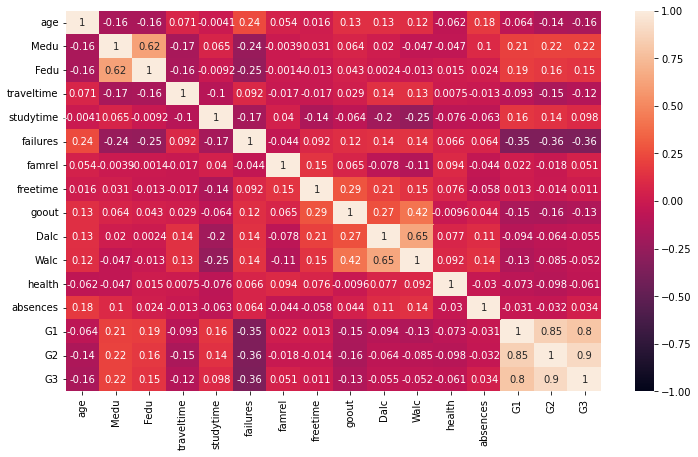

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(maths.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Here is a summary of the columns:

* Most of students come from GP school (88.4%), while the other come from MS (11.6%)
* Balance in sex
* Age ranging from 15-18 mostly, high correlation with school, guardian, failures
* Most of students come from urban area (77.7%)
* Students with family size >3 is twice ones that has family size <=3
* Percent student with family apart is small (10,4%)
* The number of mothers with higher education accounts for the largest number, while the number of fathers with education from 5th grade to 9th grade accounts for the most.
* Most of students choose school basing on school’ s courses
* Most of the student's guardian is the mother (69.1%)
* Most of student can access to internet (83.3%)
* Score ranging around 10 mostly, basing on grade in three periods





### Feature Engineering

In [ ]:
#create grade change over period of each student
maths['grade_change']=maths['G3']-maths['G1']

In [ ]:
#create average grade of each student
maths['avg_grade']=(maths['G1']+maths['G2']+maths['G3'])/3

# EDA EXPLORATION DATA ANALYSIS

Text(0.5, 1.0, 'Average grade by day alcoholic consumption')

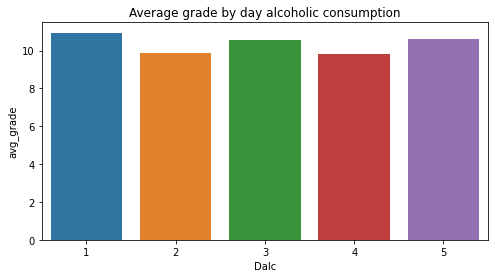

In [ ]:
fig=plt.figure(figsize=[8,4])

sns.barplot(data=maths,x='Dalc',y='avg_grade',ci=None)
plt.title('Average grade by day alcoholic consumption')

Text(0.5, 1.0, 'Average grade by weekend alcoholic consumption')

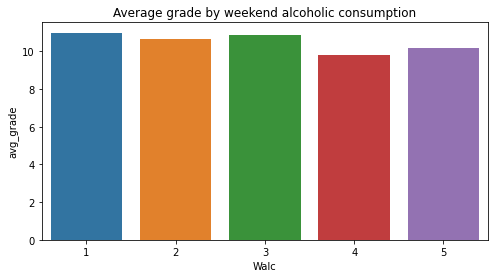

In [ ]:
fig=plt.figure(figsize=[8,4])

sns.barplot(data=maths,x='Walc',y='avg_grade',ci=None)
plt.title('Average grade by weekend alcoholic consumption')

As can be seen from both graphs, it seems that alcohol does not have effect on student's scores because there is not significant difference between score in terms of alcohol consumption level 

Text(0.5, 1.0, 'Internet effect on average grade')

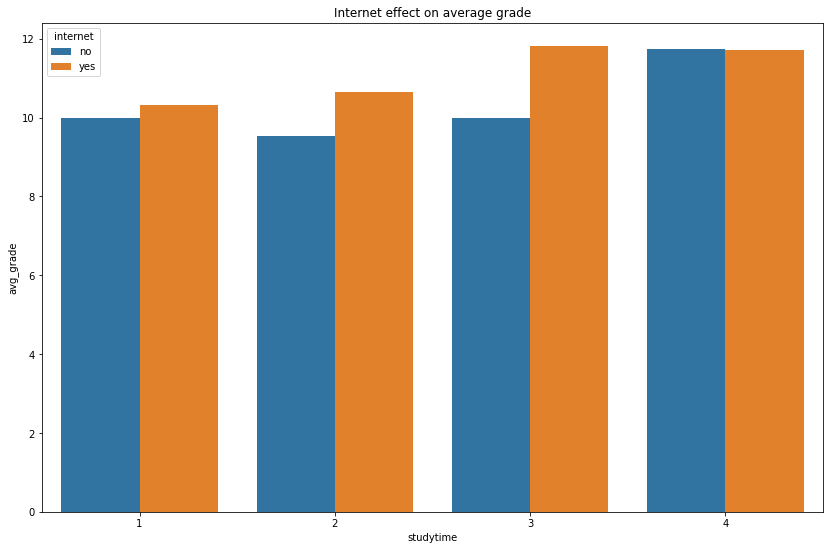

In [ ]:
fig=plt.figure(figsize=[14,9])

sns.barplot(data=maths,x='studytime',y='avg_grade',ci=None,hue='internet')
plt.title('Internet effect on average grade')

It can be seen that the more time a student spends, the higher the average score, and students with an internet connection have a higher average score than students without. It seems that higher study time results in better grade and internet have a positive effect on study.

Text(0.5, 1.0, 'Failure class on average grade ')

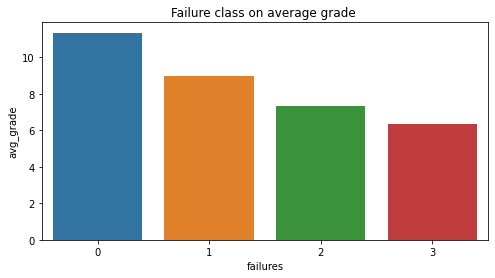

In [ ]:
fig=plt.figure(figsize=[8,4])

sns.barplot(data=maths,x='failures',y='avg_grade',ci=None)
plt.title('Failure class on average grade ')

The greater the number of failing classes, the lower the average score.

Text(0.5, 1.0, 'Failure class on average grade ')

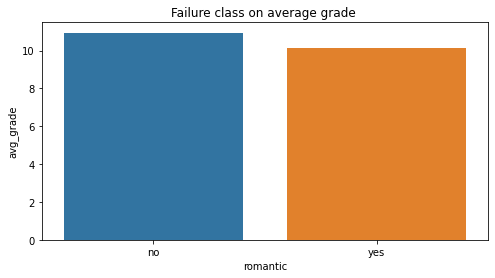

In [ ]:
fig=plt.figure(figsize=[8,4])

sns.barplot(data=maths,x='romantic',y='avg_grade',ci=None)
plt.title('Failure class on average grade ')

Students who are in a romantic relationship have higher average score than student don't, however,the disparity is not significant.

Text(0.5, 1.0, 'Correlation between average grade and absence days')

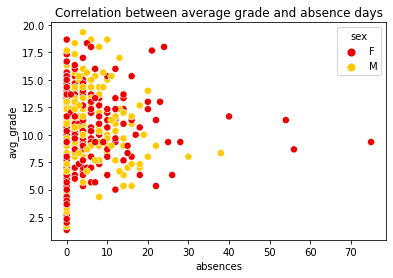

In [ ]:
sns.scatterplot(x='absences',y='avg_grade',data=maths,hue = "sex",
                palette="hot",size = "sex",
                sizes = (50, 50))
plt.title('Correlation between average grade and absence days')

The correlation between absence days and average score is weak, students mainly take breaks between 0-40 days, with scores between 2.5 - 17.5, gender does not affect the number of grades and the number of days off from school, however there are a few male students whose number of days off exceeds the general trend.

Text(0.5, 1.0, 'higher education on average grade ')

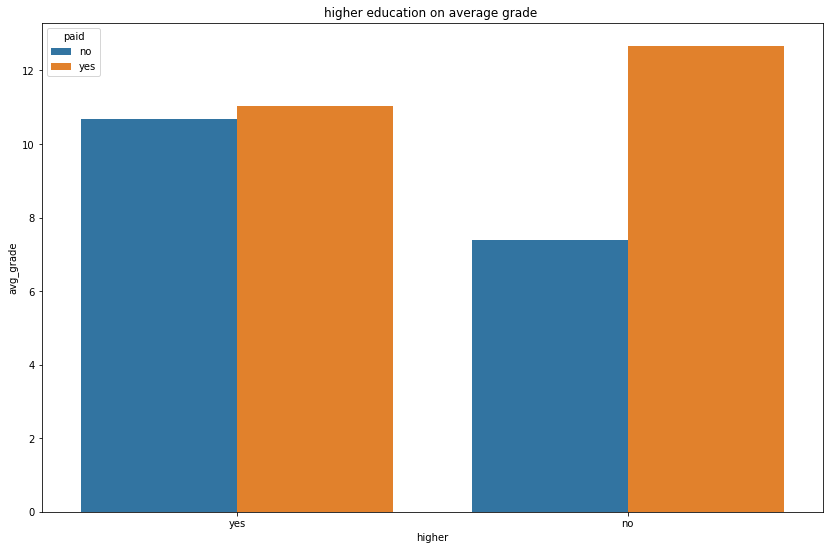

In [ ]:
fig=plt.figure(figsize=[14,9])

sns.barplot(data=maths,x='higher',y='avg_grade',hue='paid',ci=None)
plt.title('higher education on average grade ')

It can be seen that, for students who do not aim for higher education, students who take extra paid classes have higher average score than students who do not. However, it is surprising that for students who do not have higher learning needs but take extra paid classes, they have high score and it even higher than students with higher learning needs.

Text(0.5, 1.0, 'Health on average grade ')

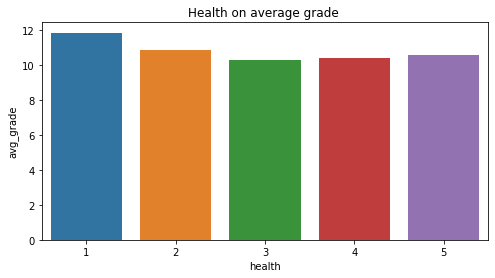

In [ ]:
fig=plt.figure(figsize=[8,4])

sns.barplot(data=maths,x='health',y='avg_grade',ci=None)
plt.title('Health on average grade ')

Students with the worst health had the highest average high scores (11.9) and scores tended to decline, although there was a increase, which suggests that health does not affect scores too much.

Text(0.5, 1.0, 'School support on grade change over time')

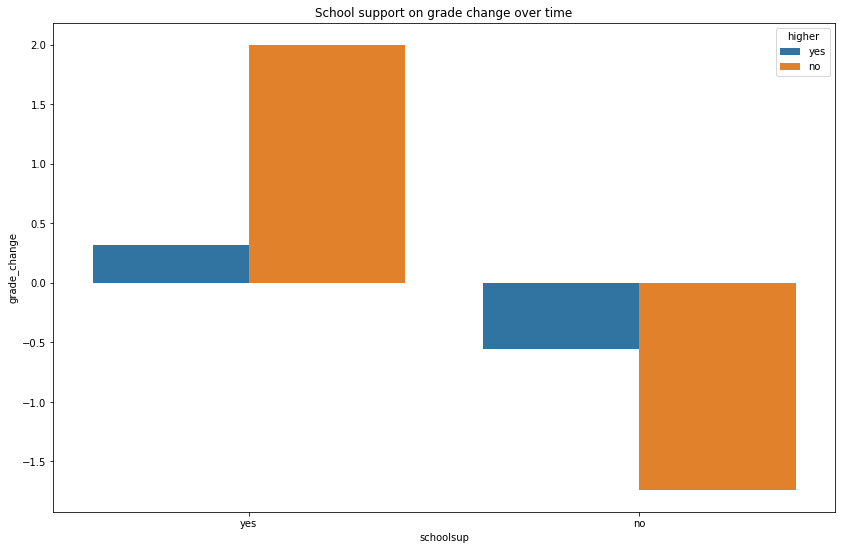

In [ ]:
fig=plt.figure(figsize=[14,9])

sns.barplot(data=maths,x='schoolsup',y='grade_change',hue='higher',ci=None)
plt.title('School support on grade change over time')

Based on the graph, students with school support have higher scores over time, and suprisingly who do not want to study further have significantly higher scores than students want to study higher. While students do not have school support witness a drop in score, it even a significant decrease for students who also do not want to study higher.

Text(0.5, 1.0, "Gooing out with friend's affect on grade change over time")

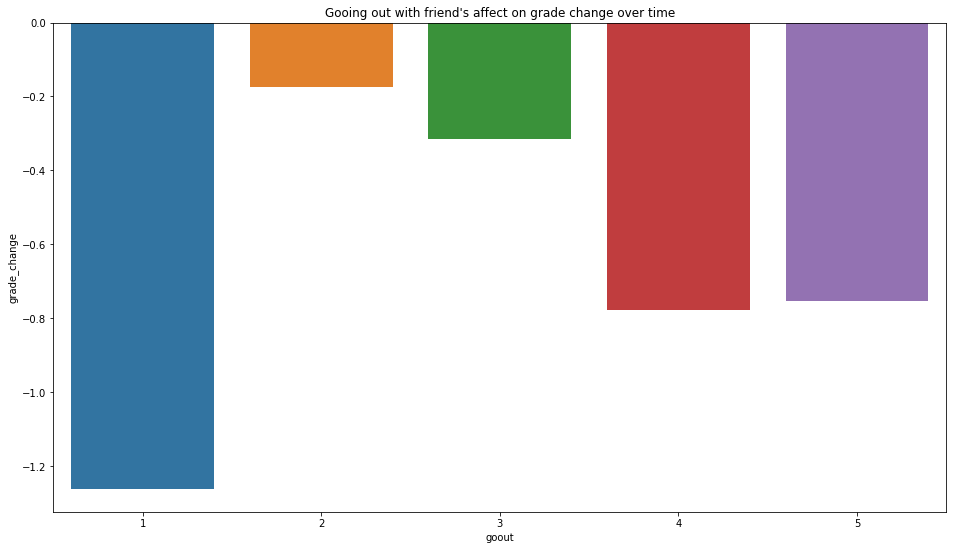

In [ ]:
fig=plt.figure(figsize=[16,9])

sns.barplot(data=maths,x='goout',y='grade_change',ci=None)
plt.title("Gooing out with friend's affect on grade change over time")

You can see that students who spend a lot of time hanging out with friends have their scores decrease relative over time, while students who hardly spend most of their time hanging out with friends have the biggest drop in scores over time. However, students who spent the least or moderate amount of time hanging out had the least drop in scores. It shows that going out with friend in moderation will have a good effect on learning, but do not spend too much nor too little. 